<br></br>
# **Word Cloud - 말뭉치 응용**
평양 남북정상회담 대국민 보고 연설문
## **1 Word Cloud**

In [1]:
# ! pip install wordcloud

In [2]:
with open('../data/pyongyang_fin.txt', 'r', encoding='utf-8') as f:
    texts = f.read()
texts[:100]

'존경하는 국민여러분. 성원해 주신 덕분에 평양에 잘 다녀왔습니다. \n\n국민 여러분께서 보셨듯이 정상회담에서 좋은 합의를 이뤘고, 최상의 환대를 받았습니다. 무엇보다 3일동안 김정은'

In [3]:
# ! pip install matplotlib

(-0.5, 399.5, 199.5, -0.5)

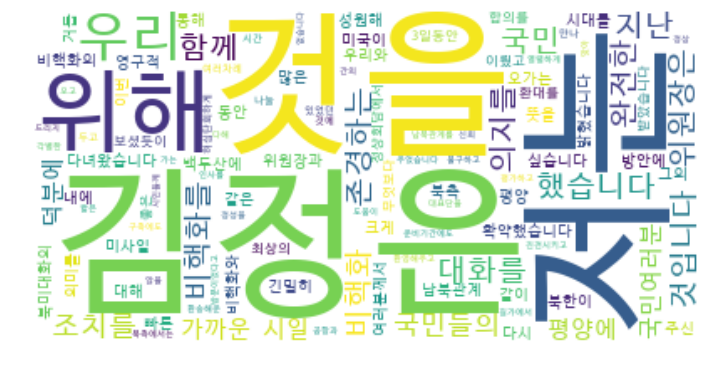

In [4]:
%matplotlib inline
from wordcloud import WordCloud
wcloud = WordCloud('../data/D2Coding.ttf', 
                   relative_scaling = 0.1, 
                   background_color='white').generate(texts)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

In [5]:
# Token 빈도결과값
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import pandas as pd
tokens  = word_tokenize(texts)
freqtxt = pd.Series(dict(FreqDist(tokens))).sort_values(ascending=False)
freqtxt[:10]

.       46
김정은      7
,        6
것을       6
저는       6
수        5
위해       5
것입니다     4
우리       4
했습니다     4
dtype: int64

<br></br>
## **2 특정 형태소만 추출**
개념적 구분가능한 명사만 추출

In [6]:
from konlpy.tag import Twitter
twitter = Twitter()
tokens  = twitter.pos('인간중심경영을 아름답게 실천합니다', stem=True)
tokens

[('인간', 'Noun'),
 ('중심', 'Noun'),
 ('경영', 'Noun'),
 ('을', 'Josa'),
 ('아름답다', 'Adjective'),
 ('실천', 'Noun'),
 ('하다', 'Verb')]

In [7]:
# Twitter() 거친 후 명사만 추출하기
result = []
for token in tokens:
    if token[1] == "Noun":
        result.append(token[0])
result

['인간', '중심', '경영', '실천']

In [8]:
" ".join(result)

'인간 중심 경영 실천'

<br></br>
## **3 명사만 추출하여 Wordcloud 만들기**
tokens_noun = [token[0] &nbsp;&nbsp; for token in tokens &nbsp;&nbsp; if token[1] == 'Noun']

In [9]:
from konlpy.tag import Twitter
twitter = Twitter()
tokens  = twitter.pos(texts)
tokens[:5]

[('존경하는', 'Verb'),
 ('국민', 'Noun'),
 ('여러분', 'Noun'),
 ('.', 'Punctuation'),
 ('성원', 'Noun')]

In [10]:
# 원본 Text 내용 살펴보기
texts[:300]

'존경하는 국민여러분. 성원해 주신 덕분에 평양에 잘 다녀왔습니다. \n\n국민 여러분께서 보셨듯이 정상회담에서 좋은 합의를 이뤘고, 최상의 환대를 받았습니다. 무엇보다 3일동안 김정은 위원장과 여러차례 만나 긴 시간 많은 대화를 허심탄회하게 나눌 수 있었던 것에 큰 의미를 두고 싶습니다.\n\n남북관계를 크게 진전시키고 두 정상 간의 신뢰 구축에도 큰 도움이 된 방문이었다고 평가하고 싶습니다.\n\n북측에서는 짧은 준비기간에도 불구하고 우리 대표단을 정성을 다해 맞아 주었습니다.\n\n오고 가는 동안 공항과 길가에서 열렬하게 환영해주고 환송해준 '

In [11]:
tokens_noun = [token[0]   for token in tokens  
                          if token[1] == "Noun"]
texts_noun  = " ".join(tokens_noun)
texts_noun[:300]

'국민 여러분 성원 주신 덕분 평양 국민 여러분 정상회담 합의 최상 환대 무엇 일동 안 김정은 위원장 여러 차례 시간 대화 허심 탄회 수 것 의미 남북관계 크게 진전 두 정상 간의 신뢰 구축 도움 방문 북 준비 기간 우리 대표 단 정성 다해 동안 공항 길가 열렬 환송 평양 시민 각별 인사 수 백두산 동안 삼지연공항 배웅 준 지역 주민 감사 저 월 일 경기장 대규모 집단체조 공연 만 평양 시민 대한민국 대통령 사상 최초 연설 기회 그 한반도 영구 핵무기 핵 위협 평화 터전 저 연설 대해 열렬 박수 보 국민 여러분 지난 일간 저 김정은 '

(-0.5, 399.5, 199.5, -0.5)

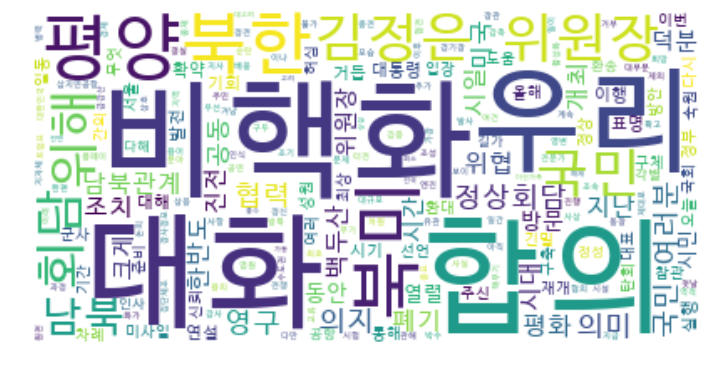

In [12]:
%matplotlib inline
from wordcloud import WordCloud
wcloud = WordCloud('../data/D2Coding.ttf',
                   relative_scaling = 0.1,
                   background_color = "white").generate(texts_noun)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

In [13]:
# Token 빈도결과값
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import pandas as pd
tokens  = word_tokenize(texts_noun)
freqtxt = pd.Series(dict(FreqDist(tokens))).sort_values(ascending=False)
freqtxt[:20]

것       14
국민      10
비핵화     10
위원장      9
합의       8
저        8
대화       8
우리       8
북한       7
그        7
북미       7
김정은      7
평양       7
남북       5
수        5
회담       5
위해       5
여러분      4
영구       4
정상회담     4
dtype: int64